In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%run 1_cleaning_data.ipynb
data = data

In [14]:
from sklearn.preprocessing import StandardScaler

In [11]:
#customer segmentation creating a data frame for customer
# on their total sales, orders id, quantity ordered

features = data.groupby('Purchase Address').agg({
    'Total_Sales':'sum',
    'Order ID':'nunique',
    'Quantity Ordered':'sum'
}).reset_index()


In [12]:

features.columns = ['customerid','Total_Sales','order_count','quantity_ordered']

In [13]:
features

,customerid,Total_Sales,order_count,quantity_ordered
0,"1 11th St, Atlanta, GA 30301",11.95,1,1
1,"1 11th St, Los Angeles, CA 90001",1700.00,1,1
2,"1 11th St, San Francisco, CA 94016",700.00,1,1
3,"1 12th St, Los Angeles, CA 90001",150.00,1,1
4,"1 12th St, New York City, NY 10001",11.99,1,1
...,...,...,...,...
140782,"999 Wilson St, Atlanta, GA 30301",99.99,1,1
140783,"999 Wilson St, Los Angeles, CA 90001",999.99,1,1
140784,"999 Wilson St, New York City, NY 10001",150.00,1,1
140785,"999 Wilson St, Portland, OR 97035",2.99,1,1


Standardizing ensures each feature contributes equally to the distance calculations in clustering.
from sklearn.preprocessing import standardscaler

In [16]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features.drop('customerid', axis=1))

features_scaled


array([[-0.58327547, -0.47876859, -0.56224164],
       [ 3.64507636, -0.47876859, -0.56224164],
       [ 1.14020279, -0.47876859, -0.56224164],
       ...,
       [-0.23747768, -0.47876859, -0.56224164],
       [-0.60571914, -0.47876859, -0.56224164],
       [-0.23747768, -0.47876859, -0.56224164]])

In [19]:
from sklearn.cluster import KMeans
inertia = []

In [20]:
for n in range(1,11):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)


In [21]:
inertia

[422360.9999999915,
 228336.79638797994,
 185988.14911500836,
 120704.89421461654,
 106747.57172046587,
 80670.27245460893,
 68935.20751492647,
 64711.82944067222,
 50382.23954539698,
 44876.48503314442]

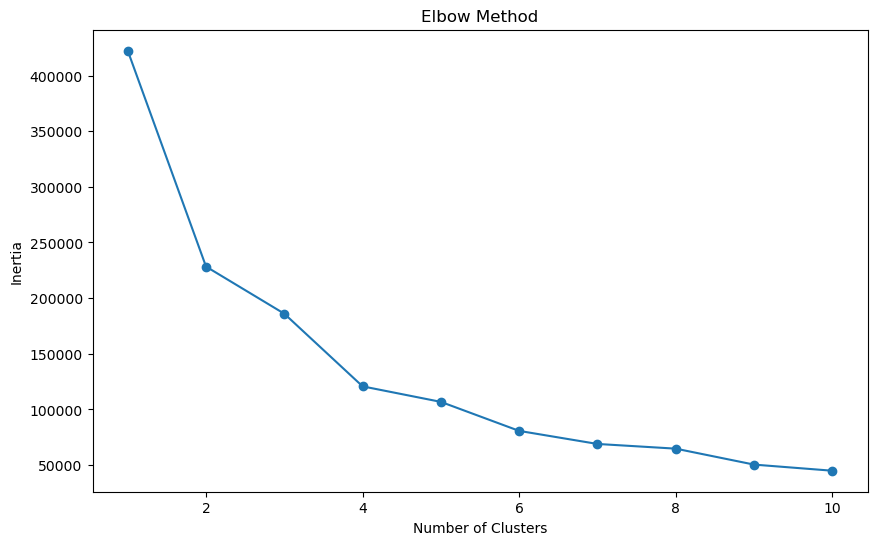

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), inertia, marker ='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [27]:
#analyzing kmeans with choosen number of customers
kmeans = KMeans(n_clusters=3)
features['Segments'] = kmeans.fit_predict(features_scaled)
features.head(2)

,customerid,Total_Sales,order_count,quantity_ordered,Segments
0,"1 11th St, Atlanta, GA 30301",11.95,1,1,2
1,"1 11th St, Los Angeles, CA 90001",1700.00,1,1,0


In [26]:
features.Segments.unique()

array([1, 2, 0])

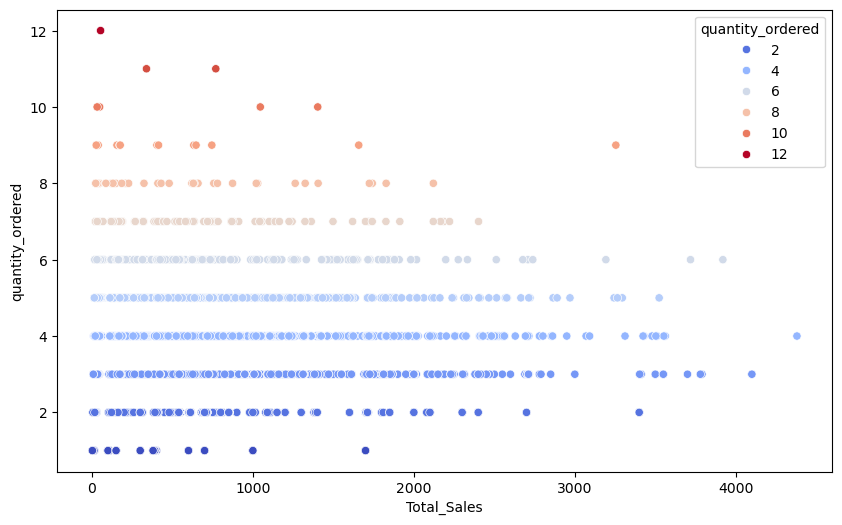

In [32]:
#this code is for scatter plot of 
#Understand the characteristics of each segment by examining the centroids of each cluster.
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total_Sales',
                 y='quantity_ordered',
                 hue ='quantity_ordered', 
                data=features,palette='coolwarm' )

plt.show()